**Practice**

In [265]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score,precision_recall_curve,precision_score,recall_score,confusion_matrix,classification_report,auc,roc_auc_score,roc_curve
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Create data

In [266]:
X,y = make_classification(n_samples=1000,n_classes=2,n_features=10,n_clusters_per_class=4,n_informative=4)

Split data

In [267]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Scale data for pca

In [268]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

Apply PCA to visualize the data

In [269]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

In [270]:
X_train_pca.shape
y_train.shape

(800,)

Scatter plot the data to visualize

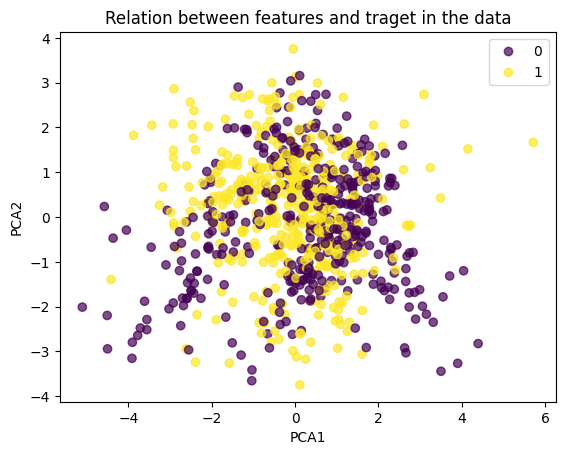

In [271]:
scatter = plt.scatter(X_train_pca[:,0],X_train_pca[:,1],c=y_train,cmap='viridis',alpha=0.7)
legend = plt.legend(scatter.legend_elements()[0], scatter.legend_elements()[1], loc='upper right')
plt.title("Relation between features and traget in the data")
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

Decision Tree

In [272]:
def train_model(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    # print(f"Accuracy of {type(model).__name__} is {accuracy_score(y_test,y_pred)}")
    return y_pred

In [273]:
models = [DecisionTreeClassifier(),RandomForestClassifier(),SVC()]
for model in models:
    train_model(model)

In [274]:
def evaluate_models(name,y_pred):
    print(f'''Evaluation scores for {name}\n
Accuracy is {accuracy_score(y_pred,y_test)}\n
precision is {precision_score(y_pred,y_test)}\n
recall is {recall_score(y_pred,y_test)}\n
confussion matrix: \n{confusion_matrix(y_test,y_pred)}\n
classification report: \n{classification_report(y_test,y_pred)}\n
''')

In [275]:
for model in models:
    y_pred = train_model(model)
    evaluate_models(type(model).__name__,y_pred)

Evaluation scores for DecisionTreeClassifier

Accuracy is 0.675

precision is 0.7525773195876289

recall is 0.6403508771929824

confussion matrix: 
[[62 41]
 [24 73]]

classification report: 
              precision    recall  f1-score   support

           0       0.72      0.60      0.66       103
           1       0.64      0.75      0.69        97

    accuracy                           0.68       200
   macro avg       0.68      0.68      0.67       200
weighted avg       0.68      0.68      0.67       200



Evaluation scores for RandomForestClassifier

Accuracy is 0.765

precision is 0.7938144329896907

recall is 0.7403846153846154

confussion matrix: 
[[76 27]
 [20 77]]

classification report: 
              precision    recall  f1-score   support

           0       0.79      0.74      0.76       103
           1       0.74      0.79      0.77        97

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.76       200
weighted avg   